In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_csv('gold.csv')

In [4]:
rate_data = data[['USD (AM)']]

In [5]:
print("Shape of the dataset:", rate_data.shape)
print("First 10 rows of the dataset:")
print(rate_data.head(10))

Shape of the dataset: (4718, 1)
First 10 rows of the dataset:
   USD (AM)
0    272.80
1    269.00
2    268.75
3    268.00
4    268.60
5    267.75
6    266.70
7    264.80
8    263.65
9    263.35


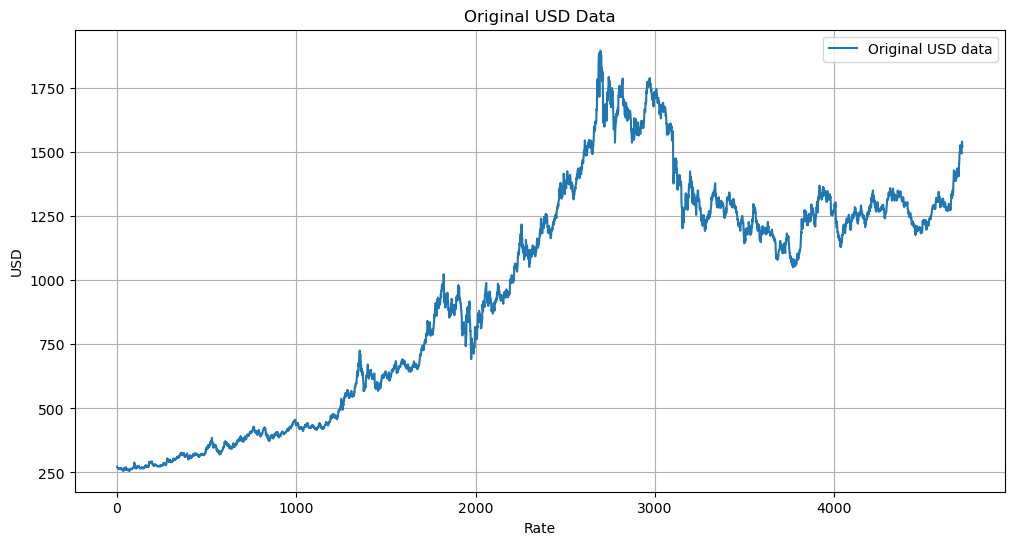

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(rate_data['USD (AM)'], label='Original USD data')
plt.title('Original USD Data')
plt.xlabel('Rate')
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

In [8]:
rolling_mean_5 = rate_data['USD (AM)'].rolling(window=5).mean()
rolling_mean_10 = rate_data['USD (AM)'].rolling(window=10).mean()

In [9]:
rolling_mean_5.head(10)
rolling_mean_10.head(20)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     267.340
10    266.510
11    265.920
12    265.455
13    265.230
14    264.980
15    264.915
16    264.815
17    264.695
18    264.780
19    264.755
Name: USD (AM), dtype: float64

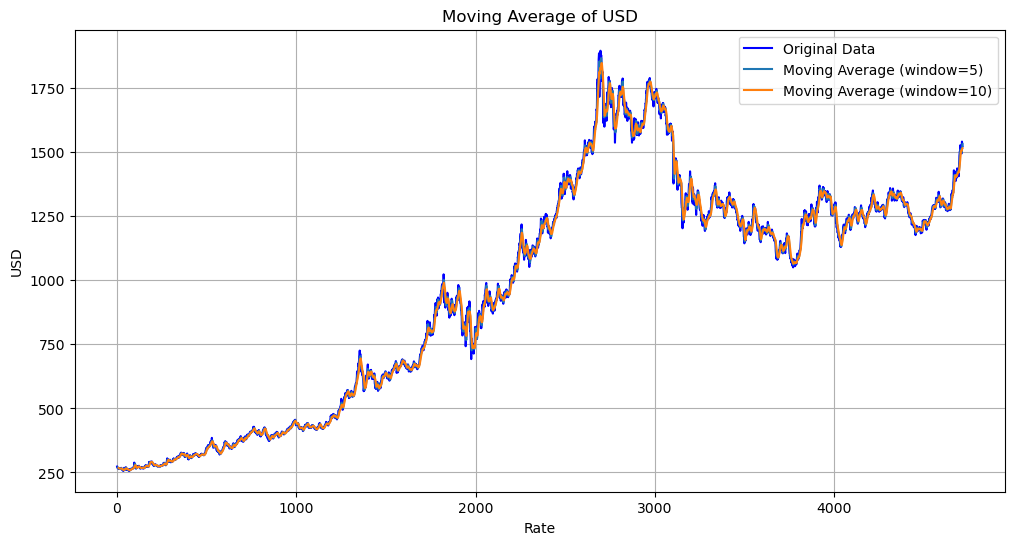

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(rate_data['USD (AM)'], label='Original Data', color='blue')
plt.plot(rolling_mean_5, label='Moving Average (window=5)')
plt.plot(rolling_mean_10, label='Moving Average (window=10)')
plt.title('Moving Average of USD')
plt.xlabel('Rate')
plt.ylabel('USD')
plt.legend()
plt.grid()
plt.show()

In [11]:
data.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [12]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_monthly = data.resample('MS').mean()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_usd = pd.Series(
    scaler.fit_transform(data_monthly[['USD (AM)']]).flatten(),
    index=data_monthly.index,
    name='USD_scaled'
)


Text(0.5, 1.0, 'Visual evaluation')

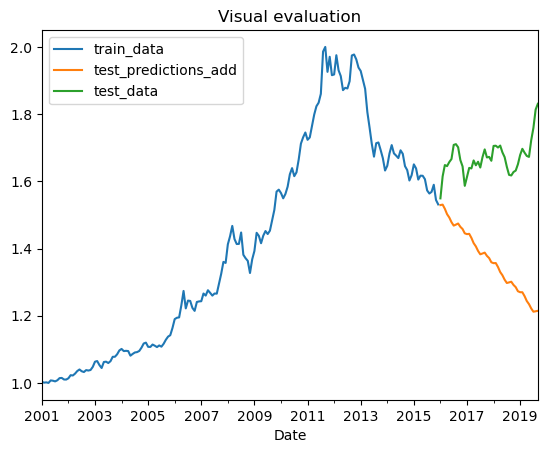

In [13]:
scaled_usd=scaled_usd+1  
x=int(len(scaled_usd)*0.8)
train_data = scaled_usd[:x]
test_data = scaled_usd[x:]
from sklearn.metrics import mean_squared_error

model_add = ExponentialSmoothing(train_data, trend='add', seasonal='mul').fit()

test_predictions_add = model_add.forecast(steps=len(test_data))

ax=train_data.plot()
test_predictions_add.plot(ax=ax)
test_data.plot(ax=ax)
ax.legend(["train_data", "test_predictions_add","test_data"])
ax.set_title('Visual evaluation')

In [14]:
np.sqrt(mean_squared_error(test_data, test_predictions_add))

np.sqrt(scaled_usd.var()),scaled_usd.mean()

(0.2962903781754352, 1.4616950638536346)

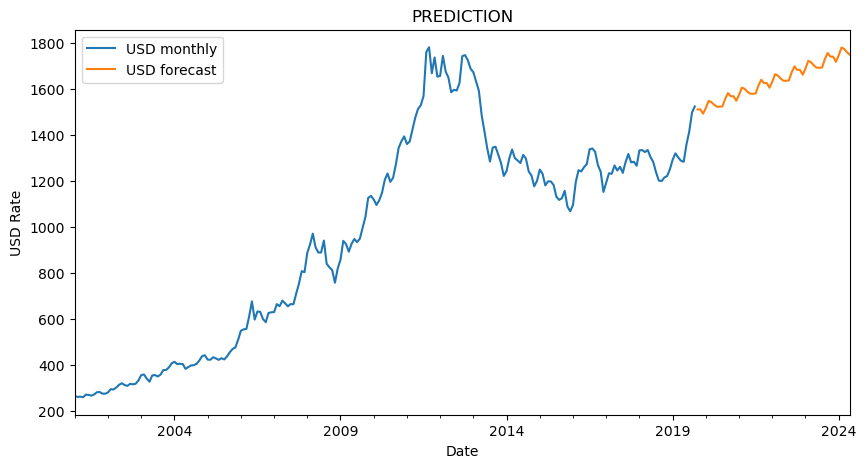

In [15]:
usd_series = data_monthly['USD (AM)']

model = ExponentialSmoothing(usd_series, trend='add', seasonal='mul', seasonal_periods=12).fit()

predictions = model.forecast(steps=int(len(usd_series)/4))

ax = usd_series.plot(figsize=(10, 5))
predictions.plot(ax=ax)
ax.legend(["USD monthly", "USD forecast"])
ax.set_xlabel('Date')
ax.set_ylabel('USD Rate')
ax.set_title('PREDICTION')
plt.show()
